<a href="https://colab.research.google.com/github/g5briel/DataPUCPR1/blob/main/Exercise_L05_Correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
pip install uci-dataset

In [2]:
pip install ucimlrepo

Linear Regression MSE: 53.505619124502076

Pearson Correlation Coefficients: [0.08749060640259823, -0.2105670462772168, -0.6736128553689182, 0.5710049111111485, 0.5463066525036047, 0.523286507028756]
Spearman Correlation Coefficients: [0.06692764155325676, -0.2817525504040157, -0.7759483354370685, 0.6173333077278148, 0.5784190851594874, 0.4376723725539239]
Kendall Tau Correlation Coefficients: [0.047391327925864465, -0.1882656810455034, -0.5817480711898911, 0.4639960447113715, 0.4092683931221921, 0.32325167624196105]

VIF Factors:
                                             VIF
Intercept                               1.000000
X1 transaction date                     1.014674
X2 house age                            1.014287
X3 distance to the nearest MRT station  4.323019
X4 number of convenience stores         1.617038
X5 latitude                             1.610234
X6 longitude                            2.926302

Condition Number: 4.1130777548293365


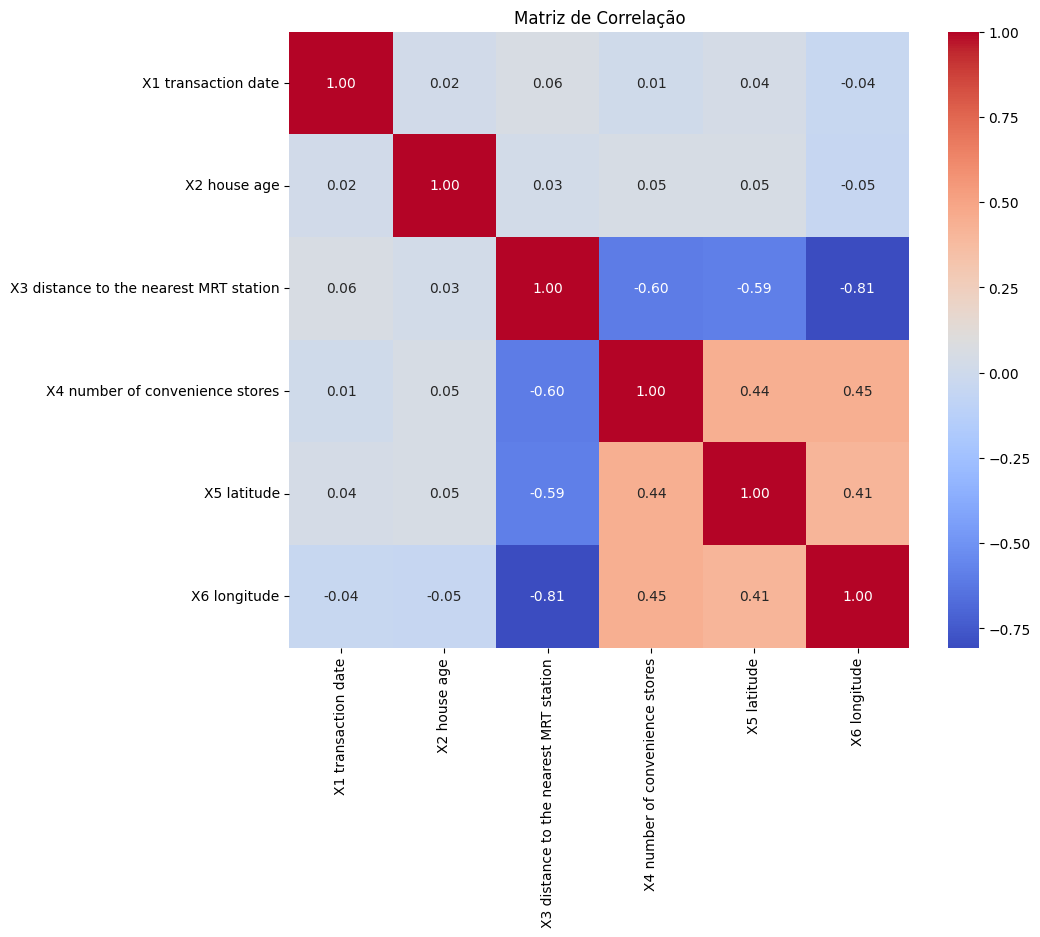

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr, kendalltau
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset => https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
real_estate_valuation = fetch_ucirepo(id=477)

# Data
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets.squeeze()  # Ensure y is a 1D array

# Remove non-numeric columns if any (Based on the provided dataset details, this step might not be necessary)
X_numeric = X.select_dtypes(include=[np.number])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Prepare data for VIF calculation
X_const = np.insert(X_scaled, 0, 1, axis=1)
features = ['Intercept'] + X_numeric.columns.tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# Calculating correlations
def calculate_correlations(X, y):
    pearson_corrs = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
    spearman_corrs = [spearmanr(X[:, i], y)[0] for i in range(X.shape[1])]
    kendall_corrs = [kendalltau(X[:, i], y)[0] for i in range(X.shape[1])]
    return pearson_corrs, spearman_corrs, kendall_corrs

pearson_corrs, spearman_corrs, kendall_corrs = calculate_correlations(X_scaled, y)
print("\nPearson Correlation Coefficients:", pearson_corrs)
print("Spearman Correlation Coefficients:", spearman_corrs)
print("Kendall Tau Correlation Coefficients:", kendall_corrs)

# VIF
vif_data = pd.DataFrame([variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])], index=features, columns=['VIF'])
print("\nVIF Factors:")
print(vif_data)

# Condition Number
cond_number = np.linalg.cond(X_train)
print(f"\nCondition Number: {cond_number}")

# Convertendo X_scaled de volta para um DataFrame para facilitar a manipulação
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Calculando a matriz de correlação
corr_matrix = X_scaled_df.corr()

# Gerando o gráfico da matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


Linear Regression MSE: 95.97094009110677

Pearson Correlation Coefficients: [0.4978319193241573, 0.13482926149740487, -0.10575491629731355, -0.28963338498530455, 0.3660788271885193, -0.16493461446010965, -0.16724124729005824, 0.3288730007799875]
Spearman Correlation Coefficients: [0.4776143065003231, 0.16410546676296717, -0.07782971890884373, -0.3084139699115922, 0.34778637298702414, -0.18354244378833753, -0.17996203988452888, 0.5960276340337732]
Kendall Tau Correlation Coefficients: [0.32723687003499136, 0.11933487577797344, -0.05958742209252198, -0.2060845472403445, 0.2496619910002227, -0.12375710726525764, -0.12225479416638312, 0.44907969730252156]

VIF Factors:
                         VIF
Intercept           1.000000
Cement              7.488944
Blast Furnace Slag  7.276963
Fly Ash             6.170634
Water               7.003957
Superplasticizer    2.963776
Coarse Aggregate    5.074617
Fine Aggregate      7.005081
Age                 1.118367

Condition Number: 8.3929563017306


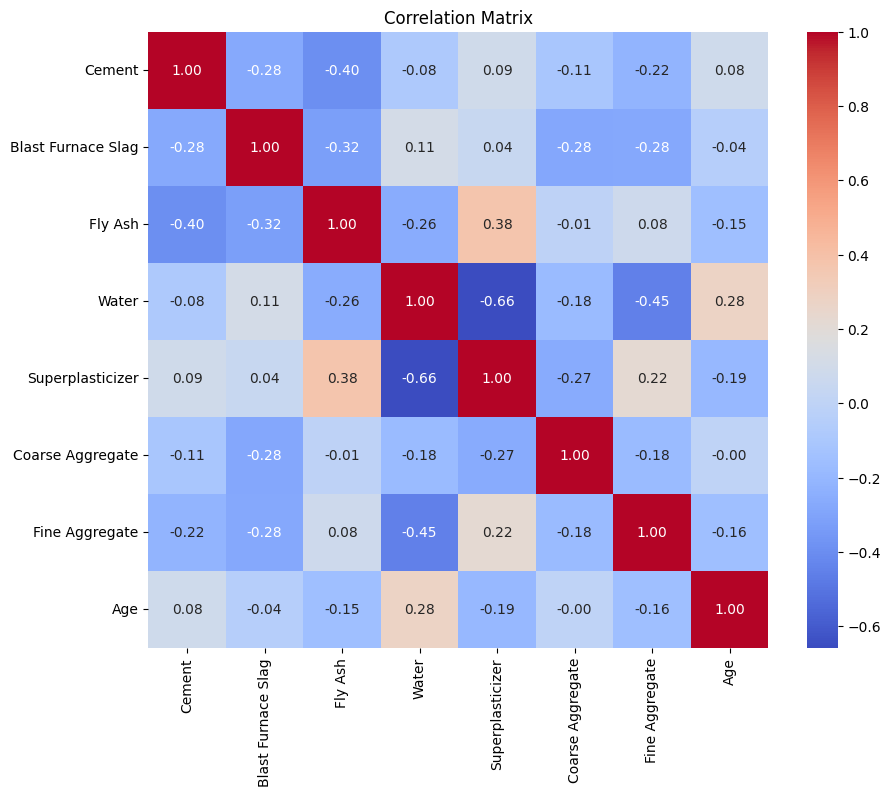

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr, kendalltau
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset =>https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
concrete_compressive_strength = fetch_ucirepo(id=165)

# Data
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets.squeeze()  # Ensure y is a 1D array

# Since all columns are numeric in this dataset, we proceed directly to scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare data for VIF calculation
X_const = np.insert(X_scaled, 0, 1, axis=1)
features = ['Intercept'] + X.columns.tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# Calculating correlations
def calculate_correlations(X, y):
    pearson_corrs = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
    spearman_corrs = [spearmanr(X[:, i], y)[0] for i in range(X.shape[1])]
    kendall_corrs = [kendalltau(X[:, i], y)[0] for i in range(X.shape[1])]
    return pearson_corrs, spearman_corrs, kendall_corrs

pearson_corrs, spearman_corrs, kendall_corrs = calculate_correlations(X_scaled, y)
print("\nPearson Correlation Coefficients:", pearson_corrs)
print("Spearman Correlation Coefficients:", spearman_corrs)
print("Kendall Tau Correlation Coefficients:", kendall_corrs)

# VIF
vif_data = pd.DataFrame([variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])], index=features, columns=['VIF'])
print("\nVIF Factors:")
print(vif_data)

# Condition Number
cond_number = np.linalg.cond(X_train)
print(f"\nCondition Number: {cond_number}")

# Converting X_scaled back into a DataFrame for ease of manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculating the correlation matrix
corr_matrix = X_scaled_df.corr()

# Generating the correlation matrix plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
!pip install -U scikit-learn


Linear Regression MSE: 8.19545210407378

Pearson Correlation Coefficients: [-0.8042028248058978, -0.775396285420554, -0.7714371350025524, -0.8317409332443351, 0.4202889121016507, 0.5792671330833096, 0.5634503597738431]
Spearman Correlation Coefficients: [-0.8556920118178749, -0.8218644914450967, -0.8431803735700122, -0.8749473981990712, 0.4386774795708622, 0.5734687031921751, 0.5806936941648105]
Kendall Tau Correlation Coefficients: [-0.6798473119043432, -0.6864768590301046, -0.6689615690714228, -0.6940061864338256, 0.3010959084675936, 0.4136605459645006, 0.467248965560236]

VIF Factors:
                    VIF
Intercept      1.000000
displacement  21.800494
cylinders     10.695947
horsepower     9.018033
weight        10.506049
acceleration   2.506280
model_year     1.239170
origin         1.734665

Condition Number: 11.668523921650092


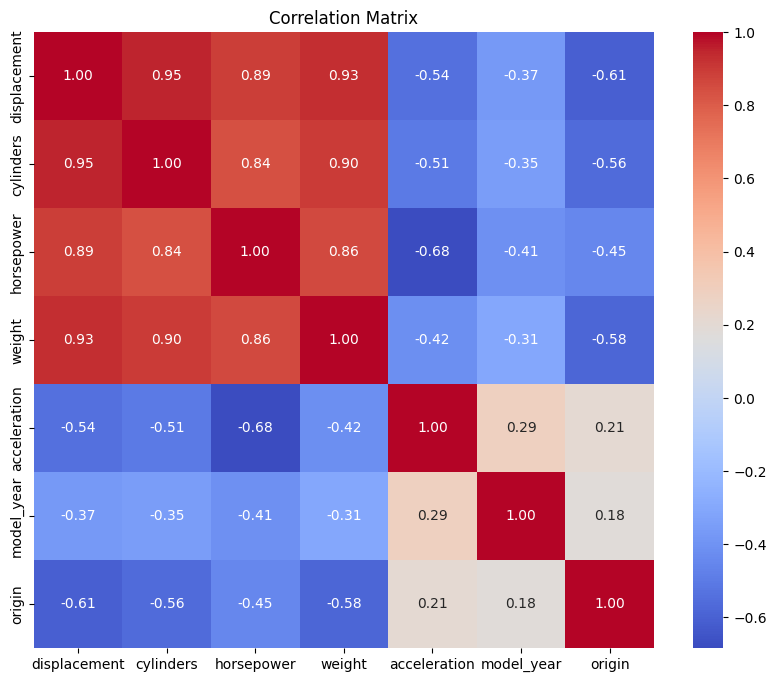

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr, spearmanr, kendalltau
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# Função para calcular correlações
def calculate_correlations(X, y):
    pearson_corrs = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
    spearman_corrs = [spearmanr(X[:, i], y)[0] for i in range(X.shape[1])]
    kendall_corrs = [kendalltau(X[:, i], y)[0] for i in range(X.shape[1])]
    return pearson_corrs, spearman_corrs, kendall_corrs

# Fetch dataset => https://archive.ics.uci.edu/dataset/9/auto+mpg
auto_mpg = fetch_ucirepo(id=9)

# Data
X = auto_mpg.data.features
y = auto_mpg.data.targets.squeeze()  # Ensure y is a 1D array

# Removendo a coluna 'car_name' se ela existir
if 'car_name' in X.columns:
    X = X.drop(columns=['car_name'])

# Mantenha apenas colunas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Prepare data for VIF calculation
X_const = np.insert(X_scaled, 0, 1, axis=1)
features = ['Intercept'] + list(X_numeric.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# Calculating correlations
pearson_corrs, spearman_corrs, kendall_corrs = calculate_correlations(X_scaled, y)
print("\nPearson Correlation Coefficients:", pearson_corrs)
print("Spearman Correlation Coefficients:", spearman_corrs)
print("Kendall Tau Correlation Coefficients:", kendall_corrs)

# VIF
vif_data = pd.DataFrame([variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])], index=features, columns=['VIF'])
print("\nVIF Factors:")
print(vif_data)

# Condition Number
cond_number = np.linalg.cond(X_train)
print(f"\nCondition Number: {cond_number}")

# Converting X_scaled back into a DataFrame for ease of manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Calculating the correlation matrix
corr_matrix = X_scaled_df.corr()

# Generating the correlation matrix plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
